# Naive Bayes

# Import Libraries

In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\silwa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\silwa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\silwa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\silwa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\silwa\AppData\Roaming\nltk_data...
[

True

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import matplotlib.pyplot as plt

# Import File

In [4]:
df = pd.read_csv("data/TwitterDataset.csv", encoding='latin')

In [5]:
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [6]:
df.drop(columns=["File Name"], inplace=True)
df.dropna(inplace=True)

In [7]:
df["LABEL"].value_counts()

LABEL
neutral     1771
positive    1646
negative    1452
Name: count, dtype: int64

In [8]:
df = df[~df['LABEL'].isin(['neutral'])]
df.reset_index(drop=True, inplace=True)

In [9]:
df.sample(100)

,Caption,LABEL
2024,Some of the team volunteered at the SMGA outin...,positive
698,@Sia I really don't know what this look spouse...,negative
2486,"RT @Gifts_of_Cheer: Squealing with delight, ki...",positive
843,RT @colinmunford: @davidgboon Josh was delighted,positive
2551,RT @halo_japan: HALO¥Ç¥Ó¥å©`Çú¡¸FEVER-Japanese...,negative
...,...,...
280,RT @_carrienet_: There is no value in comparis...,positive
2639,Have you seen the Award Winning Dreamgirl Coll...,positive
1085,You have to be mentally deficient to accept th...,negative
34,So...have to come up with a product or service...,negative


In [10]:
df["LABEL"].value_counts()

LABEL
positive    1646
negative    1452
Name: count, dtype: int64

In [11]:
df['LABEL'] = df['LABEL'].map({'negative':0, 'positive':1})

# Preprocess

In [12]:
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def clean_text(text):
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Removing special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_text(text):
    return word_tokenize(text)

def case_folding(text):
    return text.lower()

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    text = remove_usernames(text)
    text = remove_hashtags(text)
    text = clean_text(text)
    text = case_folding(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    # tokens = stem_tokens(tokens)
    return ' '.join(tokens)

In [13]:
text = df['Caption'][6]
print(text)
print(preprocess_text(text))

On day 9.. It's now in my daily routine.. Feeling guuuuurdddd! ? #Aching #PainNoGain #FeelingGood 
day daily routine feeling guuuuurdddd aching painnogain feelinggood


# Preprocess

In [14]:
X = df['Caption'].apply(preprocess_text)
y = df['LABEL'].values

# Split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

# Tokenize

In [16]:
num_words = 1000
embedding_dim = 50
max_len = 60
padding = 'post'
oov_token = "<null>"


In [17]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    # Encode each word    
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    tokenizer.fit_on_texts(train_sentences)
    return tokenizer

In [18]:
tokenizer = fit_tokenizer(x_train, num_words, oov_token)
word_index = tokenizer.word_index

In [19]:
word_index

{'<null>': 1,
 'rt': 2,
 'love': 3,
 'happy': 4,
 'day': 5,
 'new': 6,
 'today': 7,
 'one': 8,
 'take': 9,
 'like': 10,
 'get': 11,
 'passionate': 12,
 'night': 13,
 'excited': 14,
 'black': 15,
 'quiz': 16,
 'feeling': 17,
 'happiness': 18,
 'time': 19,
 'got': 20,
 'man': 21,
 'life': 22,
 'fun': 23,
 'see': 24,
 'htt': 25,
 'vibrant': 26,
 'u': 27,
 'beautiful': 28,
 'still': 29,
 'strong': 30,
 'last': 31,
 'much': 32,
 'crazy': 33,
 'look': 34,
 'fear': 35,
 'distressed': 36,
 'thank': 37,
 'birthday': 38,
 'good': 39,
 'winter': 40,
 'delighted': 41,
 'ecstatic': 42,
 'world': 43,
 'year': 44,
 'go': 45,
 'positive': 46,
 'valentine': 47,
 'us': 48,
 'broken': 49,
 'february': 50,
 'via': 51,
 'h': 52,
 'getting': 53,
 'feel': 54,
 'x': 55,
 'back': 56,
 'photo': 57,
 'great': 58,
 'cut': 59,
 'little': 60,
 'old': 61,
 'energetic': 62,
 'abandoned': 63,
 'beauty': 64,
 'rainy': 65,
 'make': 66,
 'first': 67,
 'overjoyed': 68,
 'devoted': 69,
 'white': 70,
 'full': 71,
 'gloomy':

# Encode each sentence and pad

In [20]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding)    
    return padded_sequences

In [21]:
train_padded_seq = seq_and_pad(x_train, tokenizer, padding, max_len)
val_padded_seq = seq_and_pad(x_test, tokenizer, padding, max_len)

In [22]:
train_padded_seq[0]

array([830, 125,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0])

In [23]:
print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (2478, 60)

Padded validation sequences have shape: (620, 60)


# Build Model

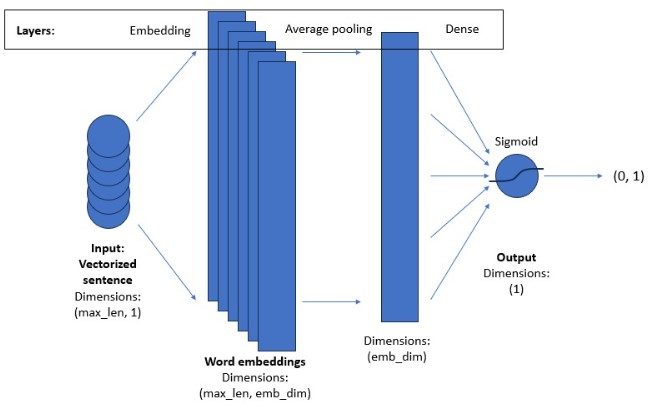

In [24]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy']) 

In [26]:
history = model.fit(train_padded_seq, y_train, epochs=30, validation_data=(val_padded_seq, y_test))

Epoch 1/30
78/78 [==============================] - 7s 15ms/step - loss: 0.6899 - accuracy: 0.5359 - val_loss: 0.6909 - val_accuracy: 0.5129
Epoch 2/30
78/78 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.5545 - val_loss: 0.6826 - val_accuracy: 0.5129
Epoch 3/30
78/78 [==============================] - 1s 6ms/step - loss: 0.6636 - accuracy: 0.6388 - val_loss: 0.6521 - val_accuracy: 0.5597
Epoch 4/30
78/78 [==============================] - 1s 7ms/step - loss: 0.6014 - accuracy: 0.7611 - val_loss: 0.5709 - val_accuracy: 0.8548
Epoch 5/30
78/78 [==============================] - 1s 7ms/step - loss: 0.4899 - accuracy: 0.8717 - val_loss: 0.4846 - val_accuracy: 0.8113
Epoch 6/30
78/78 [==============================] - 1s 7ms/step - loss: 0.3805 - accuracy: 0.8935 - val_loss: 0.3983 - val_accuracy: 0.8548
Epoch 7/30
78/78 [==============================] - 1s 6ms/step - loss: 0.3013 - accuracy: 0.9108 - val_loss: 0.3582 - val_accuracy: 0.8581
Epoch 8/30
78/78 [=

# Visualize Training

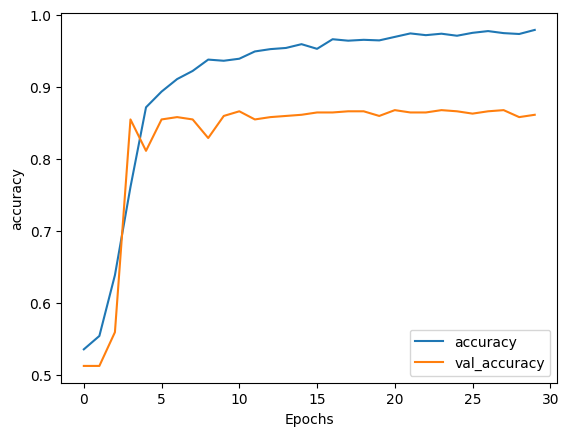

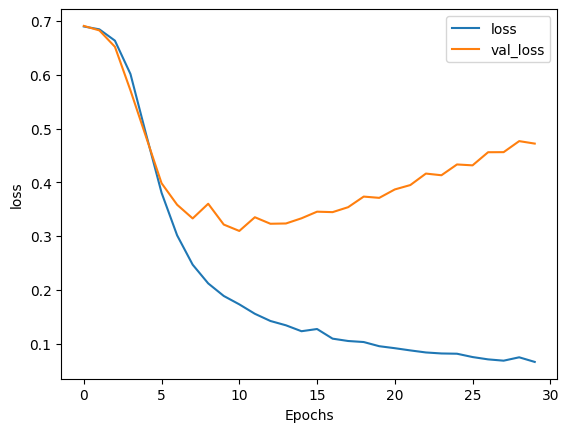

In [27]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]


weights = e.get_weights()[0]
print(f"Weights of embedding layer have shape: {weights.shape}")

Weights of embedding layer have shape: (1000, 50)


# Save metadata and vectors

In [29]:
import csv

In [30]:
with open('model/deep_vecs.tsv', 'w', newline='', encoding='utf-8') as out_v, \
     open('model/deep_meta.tsv', 'w', newline='', encoding='utf-8') as out_m:

    # Create CSV writers with tab delimiter
    vec_writer = csv.writer(out_v, delimiter='\t')
    meta_writer = csv.writer(out_m, delimiter='\t')
    
    # Iterate over the words and embeddings
    for word_num in range(1, num_words):
        word = reverse_word_index[word_num]
        embeddings = weights[word_num]
        
        # Write the word to the metadata file
        meta_writer.writerow([word])
        
        # Write the embedding vector to the vectors file
        vec_writer.writerow(embeddings)


https://projector.tensorflow.org/

# Add the vectors and metadata to a word2vec model

In [31]:
!pip install gensim

In [32]:
import numpy as np
import csv
from gensim.models import Word2Vec

In [33]:
vecs_file_path = 'model/deep_vecs.tsv'
meta_file_path = 'model/deep_meta.tsv'

# Read Word and Vectors

In [34]:
words = []
with open(meta_file_path, 'r', encoding='utf-8') as meta_file:
    reader = csv.reader(meta_file, delimiter='\t')
    for row in reader:
        words.append(row[0])

vectors = []
with open(vecs_file_path, 'r', encoding='utf-8') as vec_file:
    reader = csv.reader(vec_file, delimiter='\t')
    for row in reader:
        vectors.append(list(map(float, row)))

# Instantiate a word2vec model

In [35]:
model = Word2Vec(vector_size=embedding_dim, min_count=1) 

In [36]:
model.build_vocab([words])

In [37]:
model.wv.add_vector(words[0], vectors[0])

c:\Users\silwa\.conda\envs\daks\lib\site-packages\gensim\models\keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


999

In [38]:
model.wv['sad']

array([-0.00682009,  0.00386903,  0.01564517,  0.00489331,  0.00280117,
       -0.00891306,  0.00044728, -0.00083868,  0.01522908, -0.00913632,
       -0.00393826, -0.00848204,  0.00721883,  0.00617027,  0.01613773,
       -0.01920345, -0.0126947 ,  0.01032761,  0.01909714, -0.0005984 ,
        0.00987873, -0.01497396, -0.00407823, -0.00067952,  0.01371823,
       -0.00498251, -0.00044379,  0.01495896, -0.0042868 ,  0.00691736,
       -0.00050156, -0.01101669,  0.01227784,  0.01662644, -0.01016246,
        0.01463105,  0.00273892,  0.00173163, -0.00090001, -0.0169579 ,
        0.00584014,  0.00652881, -0.00986801, -0.00307827,  0.01647288,
        0.00507916, -0.00894451, -0.01607152,  0.01745474, -0.01540166],
      dtype=float32)

# Save

In [39]:
model.save('model/ann_sentiment.model')

# Load

In [40]:
model = Word2Vec.load("model/ann_sentiment.model")

# Predict

In [41]:
# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()

Vector for love:
[-0.01564317  0.01894812  0.0165479  -0.01758055  0.01576115 -0.01934321
  0.00669707 -0.00678033 -0.01458204  0.00099076  0.0133783  -0.00182499
  0.01659051 -0.01964499  0.00377861  0.01743717  0.00374353 -0.01096439
 -0.00626939 -0.00701821  0.00198358 -0.01484936 -0.00248968 -0.01172973
 -0.0182034   0.01636755 -0.0103887  -0.01955104 -0.00763056 -0.01451884
 -0.00915291  0.00294826 -0.01627382  0.01869269  0.0037775   0.00295593
 -0.01095092 -0.01750136 -0.00939396 -0.0135782  -0.00975702 -0.00991823
 -0.01672148 -0.01170649  0.00520916 -0.00505193 -0.01460798 -0.01436688
 -0.0097321   0.01700516]



# Similar words

In [42]:
word = 'happy'
print(f"words similar to {word}")
words = model.wv.most_similar(word, topn=8)
for word in words:
    print(word)
print()
 

words similar to happy
('et', 0.36687394976615906)
('stay', 0.3600258529186249)
('abused', 0.34215646982192993)
('program', 0.33862239122390747)
('grain', 0.3368399739265442)
('watch', 0.3261900842189789)
('dinner', 0.32329249382019043)
('game', 0.320765882730484)



In [43]:
model.wv.most_similar(['sad','happy'])

[('stay', 0.4724733233451843),
 ('et', 0.36803683638572693),
 ('wife', 0.36710578203201294),
 ('fine', 0.36223721504211426),
 ('kitchen', 0.35569116473197937),
 ('side', 0.35249063372612),
 ('serious', 0.3493953347206116),
 ('empty', 0.34602099657058716),
 ('control', 0.3455445170402527),
 ('year', 0.3360358476638794)]